# Modelado de series de tiempo

In [ ]:
# Configuracion del entorno
import warnings
warnings.simplefilter(action="ignore", category="FutureWarning")

In [42]:
# Configuracion de los graficos
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [6, 2.5]
plt.rcParams['figure.dpi'] = 150

# Descomposicion de series de tiempo

In [2]:
# Importe de librerias
import pandas
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
# Borra esto!!!!!
### Configurar API key

QUANDL_KEY = "8zhSekxBM4xPuDS5U93S"
quandl.ApiConfig.api_key=QUANDL_KEY

In [11]:
# Descargar los precios del oro de los años 2010 a 2020
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2000-01-01', 
                end_date='2011-12-31')

## Renombrando columnas y filtro de ultimo dato si hay dos valores
df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

## Ver informacion de sobre el dataframe y los primeros valores
print(f"Shape of dataframe: {df.shape}")
df.head()


Shape of dataframe: (144, 1)


,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19


<AxesSubplot:title={'center':'Gold price'}, xlabel='Date'>

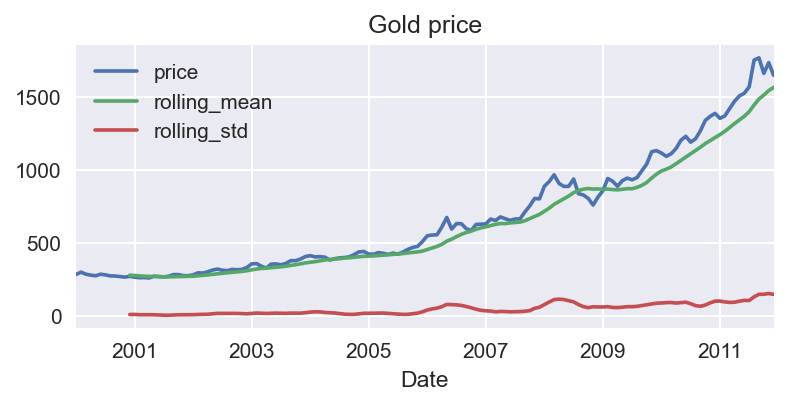

In [43]:
# Añadir media y desviacion estandar
WINDOW_SIZE = 12
df["rolling_mean"] = df.price.rolling(window=WINDOW_SIZE).mean()
df["rolling_std"] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title = "Gold price")
